Ruby Werman <br>
August 2019

## Visualize where "model" patches fall among the 80k patch data set
This notebook is an adaption of `visualize_patches.ipynb` used to see which clusters my 31 patches fell among Tak's 80k. It takes in the clustering results of the 80k + 31 patches from running the bash script in `ruby_job.bash`

In [16]:
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

In [17]:
#load in the result of running the bash script with Tak's clusters and my 31 patches
direc = "/home/rubywerman/clouds/src_analysis/tools/validation_tools/output_files/output_mix_clustering/"
file_name = "aggl_p-80_nc-20_m2_02_normed_train_patches_labels_2000-2018_random_aggl.npy"
label = np.load(direc + file_name)
tsne = np.load(direc + "tsne-80_nc-20_m2_02_normed_train_patches_labels_2000-2018_random_aggl.npy")

In [18]:
num_clusters = 20

In [19]:
#gather the patch data for the 80k patches
label_dict = {}
for i in label[31:]:
    label_dict[i] = label_dict.get(i, 0) + 1

In [20]:
#gather the patch data for Ruby's 31 patches
rubys_label_dict = {}
for i in label[:31]:
    rubys_label_dict[i] = rubys_label_dict.get(i, 0) + 1
    
for i in range(num_clusters):
    if i not in rubys_label_dict.keys():
        rubys_label_dict[i] = 0

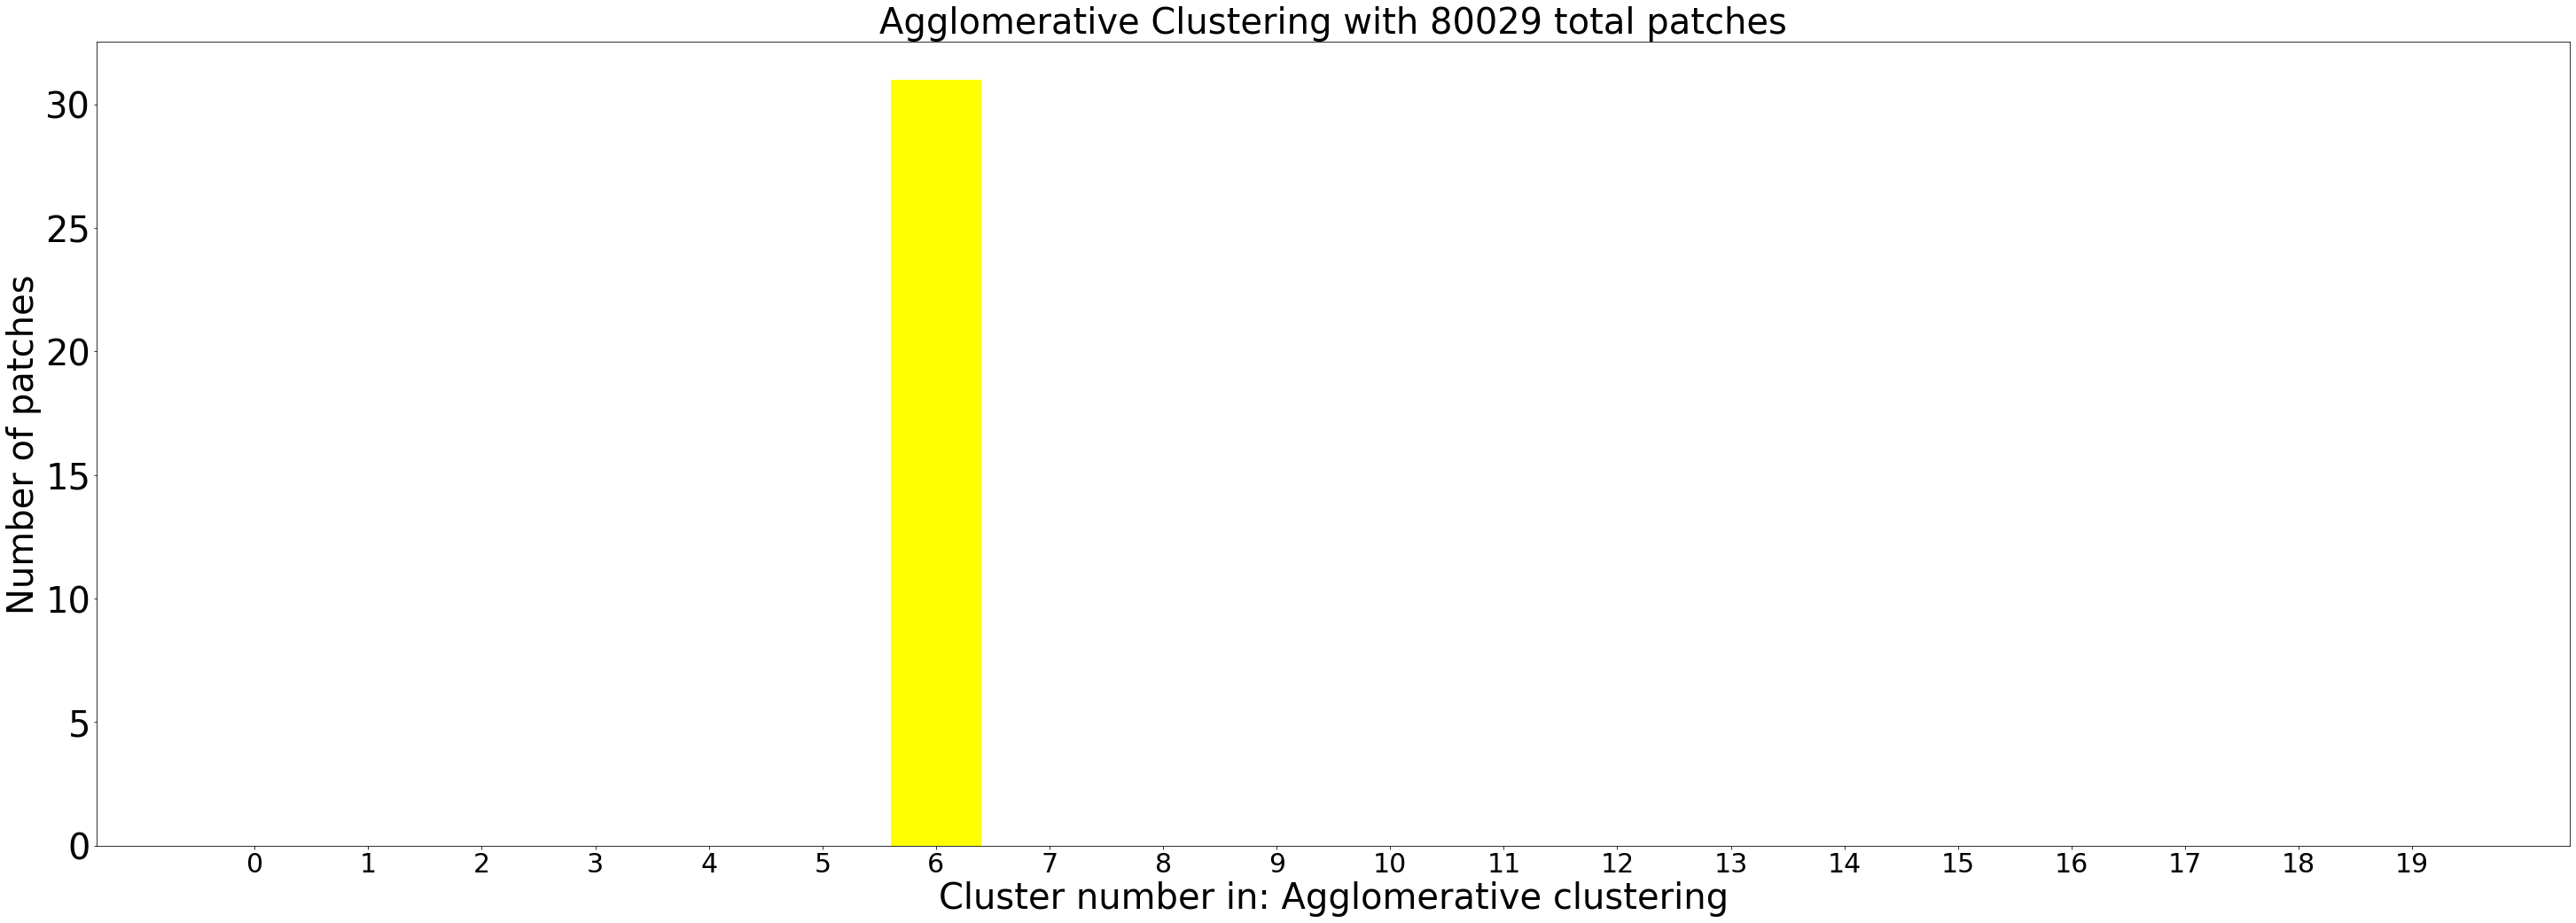

In [28]:
#create lists of the patch data for bar graph
sorted_a = []
sorted_b = []
for i in range(num_clusters):
    sorted_a.append(label_dict[i])
    sorted_b.append(rubys_label_dict[i])
    
#create stacked bar graph 
from matplotlib import rc

plt.figure(figsize=(50,20))

# Heights of bars

bars = [sorted_a, sorted_b]

# The position of the bars on the x-axis
r = range(num_clusters)

# Label for each bar and bar width
x_labels = [str(i) for i in r]
barWidth = .8

#create bars
#plt.bar(r, sorted_a, color='green', width=barWidth) #bar of the 80k patches
plt.bar(r, sorted_b, color='yellow', width=barWidth) #bar of 31 patches
#plt.bar(r, sorted_b, bottom=sorted_a, color='yellow', width=barWidth) #bar of the 31 patches if you want them stacked on top of the 80k, very difficult to see bc such a small amount of patches


# label/title graph
plt.xticks(r, x_labels, fontsize=30)
plt.yticks(fontsize=40)
plt.ylabel("Number of patches", fontsize=40)
plt.xlabel("Cluster number in: "+ "Agglomerative clustering" , fontsize=40)
#plt.legend(loc="upper right")
#plt.legend(('Tak\'s','Ruby\'s'), fontsize=40)
plt.title("Agglomerative Clustering with %d total patches"%(len(label)), fontsize=40)
plt.gcf().subplots_adjust(bottom=0.25)
    
#save image
#plt.savefig(to_save + '%d_cluster_plot.png'%(num_clusters))

# Show graphic
plt.show()

In [22]:
df = pd.DataFrame(rubys_label_dict.keys(), columns=["Cluster"])
df["# of model patches"] = rubys_label_dict.values()
df["# of patches from the 80k"] = label_dict.values()
df["total # of patches"] = df["# of model patches"] + df['# of patches from the 80k']

In [23]:
df.sort_values(by=['# of model patches'], ascending=False)

,Cluster,# of model patches,# of patches from the 80k,total # of patches
0,6,31,6253,6284
1,0,0,4427,4427
18,18,0,1198,1198
17,17,0,2391,2391
16,16,0,1676,1676
15,15,0,7740,7740
14,14,0,9468,9468
13,13,0,2851,2851
12,12,0,1877,1877
11,11,0,3846,3846


In [24]:
df.sort_values(by=['total # of patches'], ascending=False)

,Cluster,# of model patches,# of patches from the 80k,total # of patches
14,14,0,9468,9468
15,15,0,7740,7740
2,1,0,7038,7038
0,6,31,6253,6284
4,3,0,5607,5607
9,9,0,5400,5400
1,0,0,4427,4427
3,2,0,4268,4268
11,11,0,3846,3846
7,7,0,3395,3395


In [25]:
import random
def get_rand_colors(n=10, cmap_name='tab20', _seed = 12356):
    #colormap
    cmap = cm.get_cmap(cmap_name, n)
    colors = []
    for idx, i in enumerate(range(cmap.N)):
        rgb = cmap(i)[:3]
        colors += [matplotlib.colors.rgb2hex(rgb)]
    # shuffle
    random.seed(_seed)
    random.shuffle(colors)
    return colors

In [26]:
import matplotlib.patches as mpatches
def cloud_scatter(x, label):
    """
    @source: https://www.datacamp.com/community/tutorials/introduction-t-sne
    Utility function to visualize the outputs of t-SNE
    
    Inputs:
    x: a 2d numpy array containing the output of the t-SNE algorithm
    label: a 1d numpy array containing the labels of the dataset
    
    Outputs:
    None– Creates a scatterplot with as many unique colors as the number of clusters
    """
    #make a color palette with seaborn
    num_colors = len(np.unique(label))
    palette = np.array(get_rand_colors(num_colors))
    #palette = np.array(sns.color_palette("hls", num_colors))

    #make scatter plot
    fig, ax = plt.subplots(figsize=(50,25))
    scatter = ax.scatter(x[:,0], x[:,1], s=35**2, c=palette[label])

    # plot each category with a distinct label
    classes = [str(i) for i in range(num_clusters)]
    recs = []
    for i in range(num_clusters):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=palette[i]))
    ax.legend(recs,classes,loc='best', fontsize=25)
    
    ##If you want text lables at the median of data points, uncomment the following code 
    #for i in range(num_colors):
        ## Position of each label at median of data points.
        #xtext, ytext = np.median(x[label == i, :], axis=0)
        #txt = ax.text(xtext, ytext, str(i), fontsize=40)
        #txt.set_path_effects([
            #PathEffects.Stroke(linewidth=5, foreground="w"),
            #PathEffects.Normal()])
        #txts.append(txt)
        
    ##Adds a cluster label to every point on the plot. Useful for many clusters when colors can be hard to tell from each other
    #txts = []
    #for i in range(num_colors):
        #cluster = x[label == i, :]
        #for patch in cluster:
            #xtext, ytext = patch
            #txt = ax.text(xtext, ytext, str(i), fontsize=45)
            #txt.set_path_effects([
                #PathEffects.Stroke(linewidth=5, foreground="w"),
                #PathEffects.Normal()])
            #txts.append(txt)    
            
    ax.axis('off')
    plt.title("Visualization of %d patches in %s clusters produced by t-SNE"%(len(label), num_clusters), fontsize=40)
    #plt.savefig(to_save + '%d_tsne.png'%(num_clusters))
    
    # Show graphic
    plt.show()

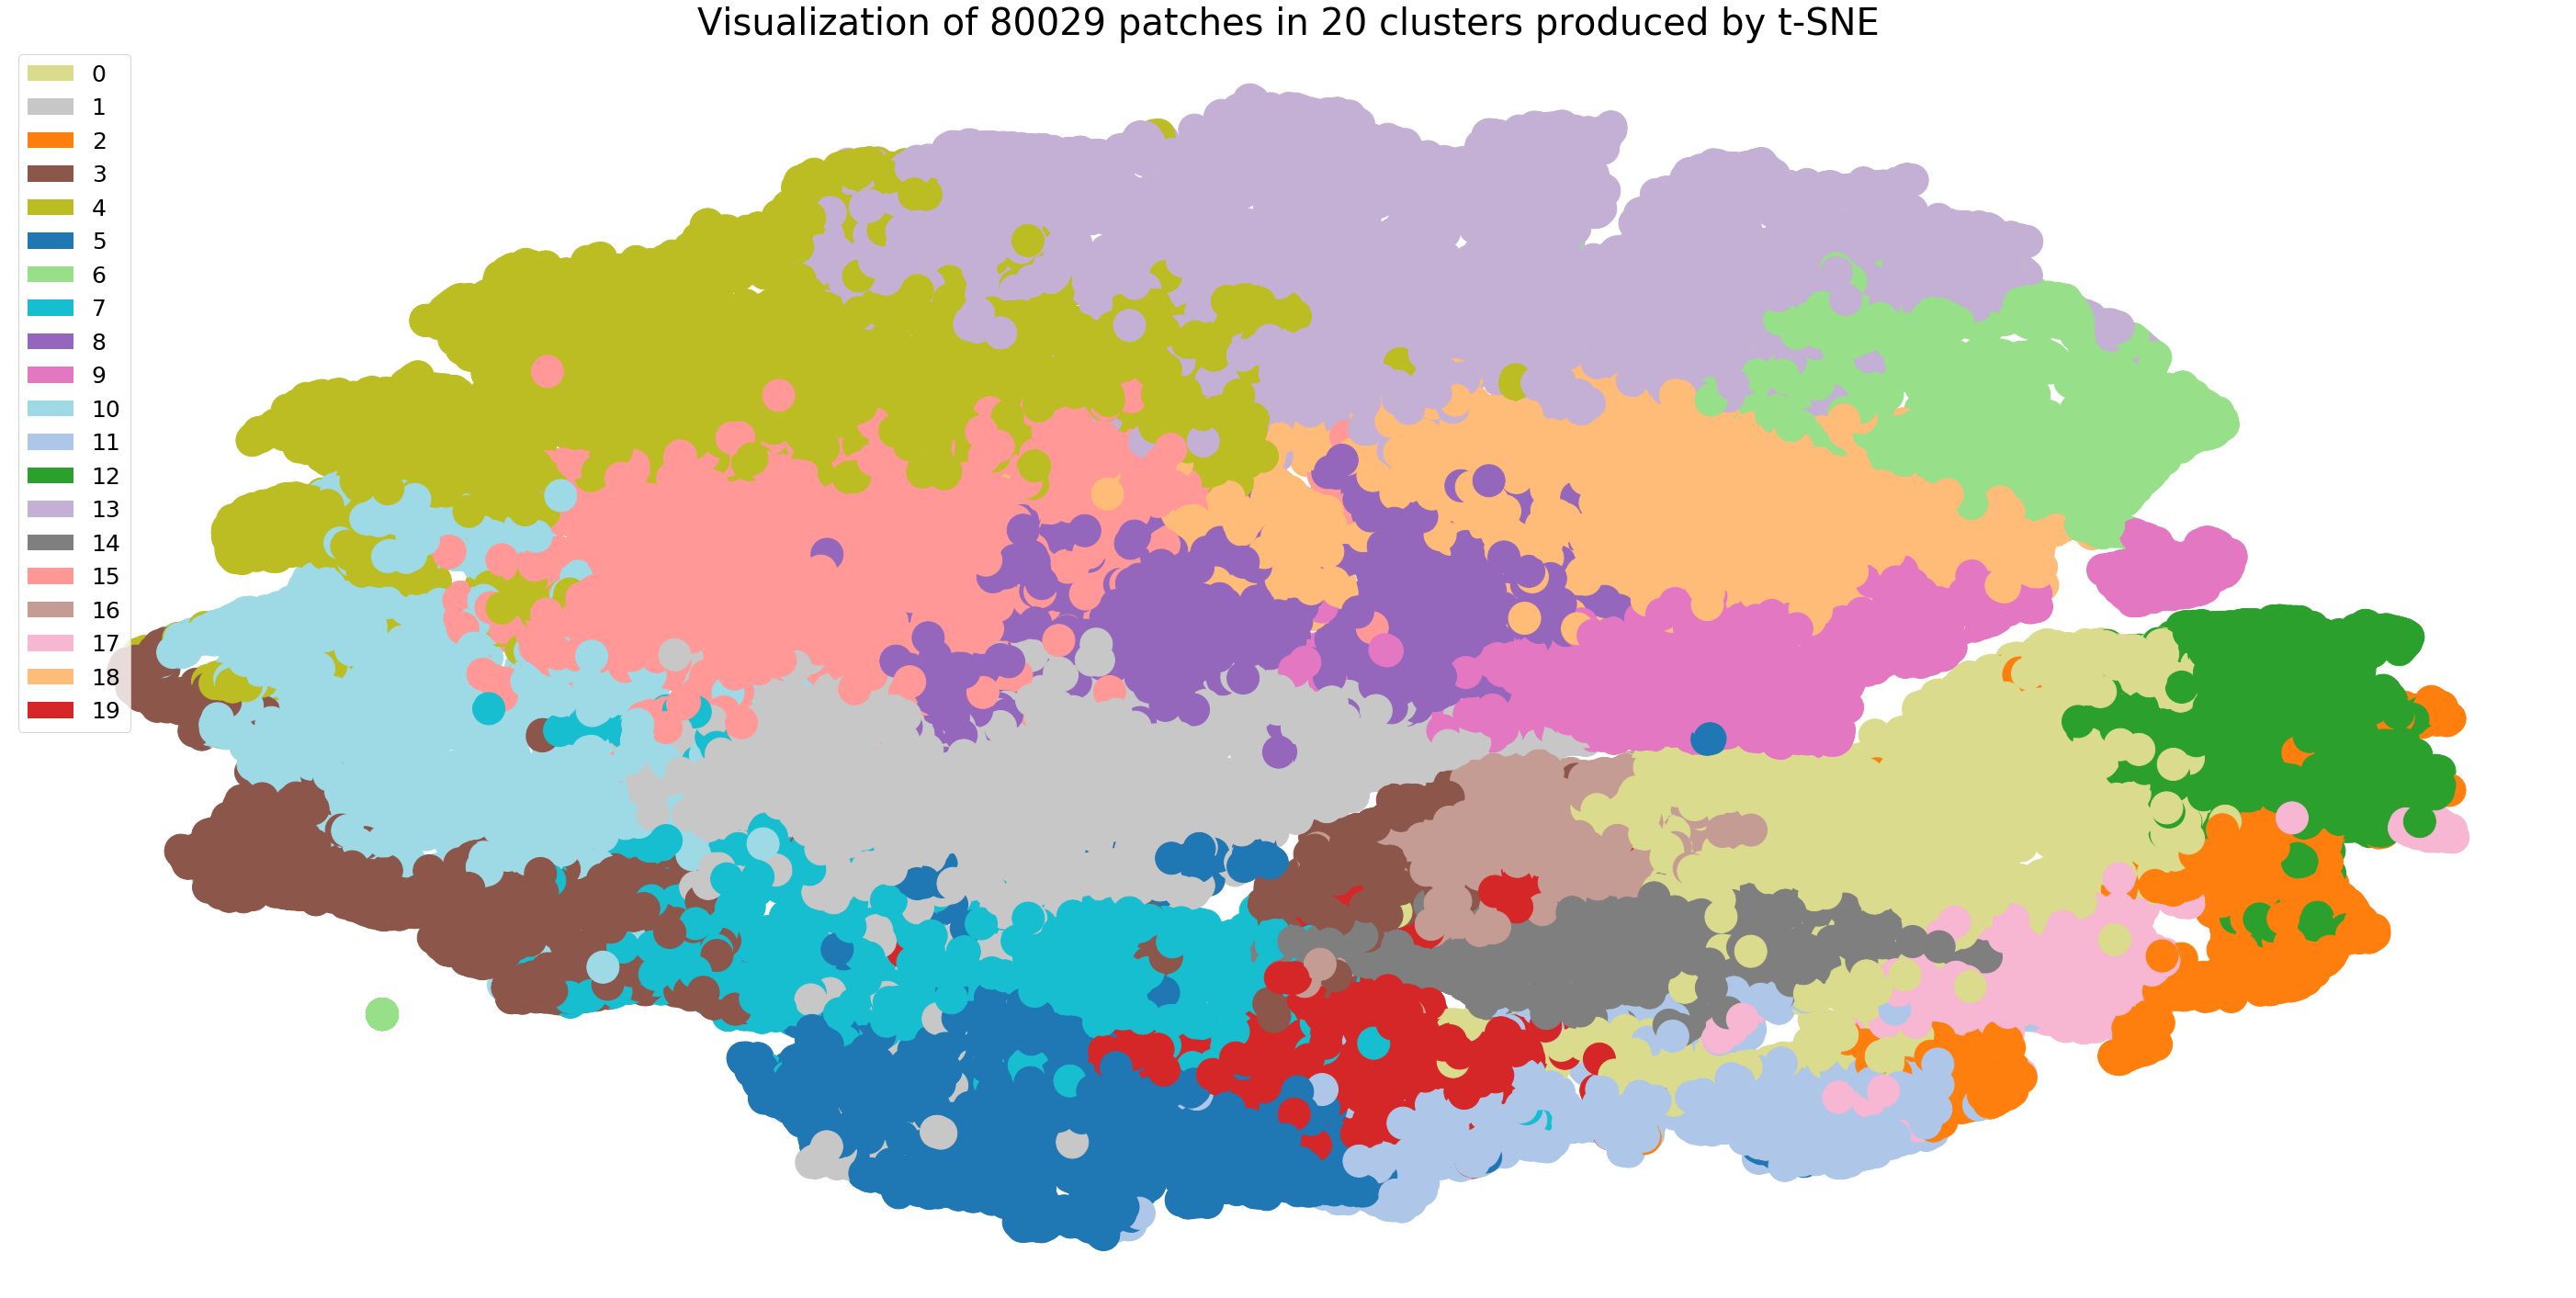

In [27]:
cloud_scatter(tsne, label)